In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')

In [2]:
nPerClust = 100
blur = 1

#     x, y
A = [ 1, 1] # centroid category 1
B = [ 5, 1] # centroid category 2

a = [ A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur ]

labels_np = np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1))))

data_np = np.hstack((a, b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()


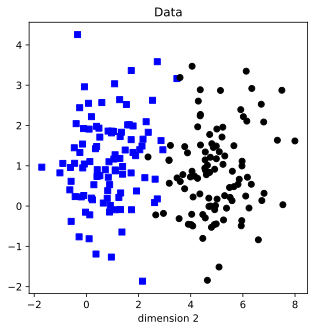

In [3]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1], 'bs')
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1], 'ko')
plt.title('Data')
plt.xlabel('dimension 1')
plt.xlabel('dimension 2')
plt.show()

In [4]:
ANNclassify = nn.Sequential(
    nn.Linear(2, 1), # input layer (number of inputs = 2 (x, y), number of outputs)
    nn.ReLU(), # activation unit
    nn.Linear(1, 1), # output layer
    nn.Sigmoid() # final activation unit
)

ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [5]:
learningRate = 0.01
lossFun = nn.BCELoss()
# Note : it is recommend to use BCEWithLogitsLoss function without explicitly adding the Sigmoid to the model
# BCEWithLogitsLoss internally use Sigmoid and this is more stable
optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)

In [6]:
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):

    yhat = ANNclassify(data) # forward pass

    loss = lossFun(yhat, labels) # compute the loss
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad() # initialize gradients to zeros
    loss.backward()
    optimizer.step()

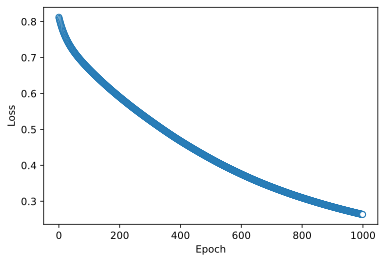

In [7]:
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [8]:
predictions = ANNclassify(data)

predlabels = predictions >0.5

# find errors
misclassified = np.where(predlabels != labels)[0]

totalacc = 100 - (100 * len(misclassified)/(2*nPerClust))
print('Final accuracy : %g%%' %totalacc)

Final accuracy : 95%


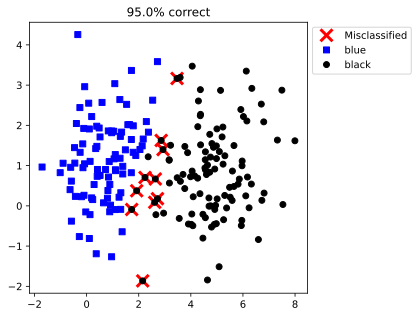

In [9]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0] ,data[misclassified,1],'rx',markersize=12,markeredgewidth=3)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0] ,data[np.where(predlabels)[0],1] ,'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.show()